# 202 回归算法评价

### 衡量回归算法的标准：MSE vs MAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn import datasets

### 波士顿房产数据

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x = boston.data[:,5]  # 只使用房间数量这个特征
x.shape

(506,)

In [6]:
y = boston.target
y.shape

(506,)

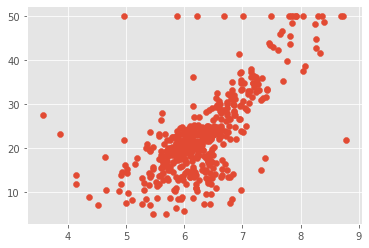

In [7]:
plt.scatter(x, y)

In [8]:
np.max(y)         # 在一些统计过程中可能对最大值进行限制，所以要剔除这些点。

50.0

In [9]:
x = x[y<50]
y = y[y<50]
print(x.shape, y.shape)

(490,) (490,)


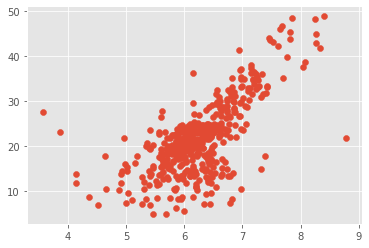

In [10]:
plt.scatter(x, y)

### 使用简单线性回归法

In [11]:
import sys
sys.path.insert(0,'./code')
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [12]:
print('训练集X：{0}，训练集Y：{1}，测试集X：{2}，测试机Y：{3}'.format(x_train.shape, y_train.shape, x_test.shape ,y_test.shape))

训练集X：(392,)，训练集Y：(392,)，测试集X：(98,)，测试机Y：(98,)


In [13]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

In [14]:
print(reg.a_,reg.b_)

7.8608543562689555 -27.459342806705543


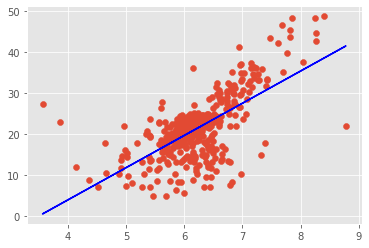

In [15]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train),color='blue')

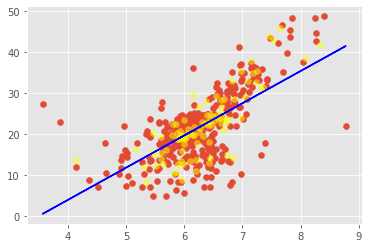

In [16]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color='yellow',alpha=0.5)
plt.plot(x_train, reg.predict(x_train),c='blue')

In [17]:
y_predict = reg.predict(x_test)

### MSE

In [18]:
mse_test = np.sum((y_predict-y_test) ** 2) / len(y_test)
mse_test

24.156602134387438

### RMSE

In [19]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### MAE

In [20]:
mae_test = np.sum(np.absolute(y_predict-y_test)) / len(y_test)
mae_test

3.5430974409463873

## 封装自己的评测函数
代码参见 [这里](./code/playML/metrics.py)

In [21]:
import sys
sys.path.insert(0, './code')
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [22]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [23]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [24]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

## scikit-learn中的MSE和MAE

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [26]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [27]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

## R Square
$$R^2=1-\frac{\sum_i \left(\hat{y}^{(i)}-y^{(i)}\right)^2}{\sum_i \left(\bar{y}-y^{(i)}\right)^2}=1-\frac{MSE(\hat{y},y)}{Var(y)}$$

### 封装我们自己的 R Score

代码参见 [这里](./code/playML/metrics.py) 

In [28]:
import sys
sys.path.insert(0,'./code')
from playML.metrics import r2_score

r2_score(y_test, y_predict)

0.6129316803937322

### scikit-learn中的 r2_score

In [29]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6129316803937324

scikit-learn中的LinearRegression中的score返回r2_score:[http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

### 在我们的SimpleRegression中添加score

In [30]:
reg.score(x_test, y_test)

0.6129316803937322